# Youtube Introduction

### YouTube is a video sharing service where users can watch, like, comment on, subscribe to, and upload their own videos. 
- Youtube company was registered on Valentine’s day - February 14, 2005.
- The website has over a billion users, and an estimated 300 hours of footage uploaded every minute. 
- The company was acquired by Google’s Alphabet in 2006 for 1.65 billion. 
- The company’s valuation stood at approximately 175 billion in 2020.
- With local versions available in over 91 countries and 80 different language options to choose from, YouTube is the number one video-sharing platform in the world with more than 95% of the internet population using it. 
- On average, a YouTuber with at least 1 million subscribers earns about 60,000 a year.


## Project Goal: 

### Identifying patterns in the Trending videos, which will lead to higher views & likes , and eventually more Youtube revenue.

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as plot_colors
from collections import Counter
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import datetime
from os import path
from PIL import Image
from matplotlib import colors
#from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [156]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Set Overview

- Contains daily record of top trending YouTube videos, with up to 200 listed trending videos per day
- Date Range: 14 Nov 2017 to 14 Jun 2018
- There are 10 countries' videos trending information:USA, Great Britain, Germany, Canada, France, Russia, Mexico, South Korea, Japan and India.
- Each region’s data is in a separate file. 
- After concatenation, we get 375,942 rows.
- Data includes video id, video title, channel title, publish time, trending date, tags, views, likes and dislikes, description, and comment count, etc..
- Category Data is in an associated json file, which we combine it with the original trending dataset.


In [157]:
df_CA = pd.read_csv("CAvideos.csv")
df_DE = pd.read_csv("DEvideos.csv")
df_FR = pd.read_csv("FRvideos.csv")
df_GB = pd.read_csv("GBvideos.csv")
df_IN = pd.read_csv("INvideos.csv")
df_JP = pd.read_csv("JPvideos.csv")
df_KR = pd.read_csv("KRvideos.csv")
df_MX = pd.read_csv("MXvideos.csv")
df_RU = pd.read_csv("RUvideos.csv")
df_US = pd.read_csv("USvideos.csv")

In [158]:
df_IN['trending_date'].nunique()
df_US[df_US.trending_date=='17.14.11'].video_id.nunique()
df_CA[df_CA.trending_date=='17.16.11'].video_id.nunique()

205

200

200

In [159]:
df_CA.shape
df_DE.shape
df_FR.shape
df_GB.shape
df_IN.shape 
df_JP.shape
df_KR.shape
df_MX.shape 
df_RU.shape
df_US.shape

(40881, 16)

(40840, 16)

(40724, 16)

(38916, 16)

(37352, 16)

(20523, 16)

(34567, 16)

(40451, 16)

(40739, 16)

(40949, 16)

In [160]:
total_videos=len(df_CA)+len(df_DE)+len(df_FR)+len(df_GB)+len(df_IN)+len(df_JP)+len(df_KR)+len(df_MX)\
             +len(df_RU)+len(df_US)
total_videos

375942

In [161]:
df_CA['region']="CA"
df_DE['region']="DE"
df_FR['region']="FR"
df_GB['region']="GB"
df_IN['region']="IN"
df_JP['region']="JP"
df_KR['region']="KR"
df_MX['region']="MX"
df_RU['region']="RU"
df_US['region']="US"

<div class="alert alert-block alert-success">
Observation: The total trending videos are almost the same, but in US and GB there are less unique video id and higher total trending days for one specific video id.
</div>

In [162]:
df_CA.video_id.nunique()
df_DE.video_id.nunique()
df_FR.video_id.nunique()
df_GB.video_id.nunique()
df_IN.video_id.nunique()
df_JP.video_id.nunique()
df_KR.video_id.nunique()
df_MX.video_id.nunique()
df_RU.video_id.nunique()
df_US.video_id.nunique()

24427

29627

30581

3272

16307

12912

15876

33513

34282

6351

Combine each country's data into the new dataframe.

In [163]:
df=pd.concat([df_CA, df_DE, df_FR, df_GB, df_IN, df_JP, df_KR, df_MX, df_RU, df_US])

In [164]:
df.publish_time.unique()

array(['2017-11-10T17:00:03.000Z', '2017-11-13T17:00:00.000Z',
       '2017-11-12T19:05:24.000Z', ..., '2018-06-14T01:31:53.000Z',
       '2018-06-13T03:27:30.000Z', '2018-06-12T18:55:26.000Z'],
      dtype=object)

<div class="alert alert-block alert-success"> Observation: The time is from November 14th, 2017 to June 14th, 2018, total 7 months.</div>

In [165]:
df.trending_date.unique()

array(['17.14.11', '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '18.29.

In [166]:
df.shape

(375942, 17)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375942 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-nu

In [168]:
df.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
region                        0
dtype: int64

<div class="alert alert-block alert-success"> Observation: There are repeated video_id in the whole data set. Because the same video may trend in different regions and trend on different days.</div>

In [169]:
df.video_id.nunique()

184287

In [170]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA


In [171]:
df[['video_id','title']].value_counts().sort_values(ascending=False).nlargest(10)

video_id     title                                                    
VYOjWnS4cMY  Childish Gambino - This Is America (Official Video)          92
UUkn-enk2RU  Marvel Studios' Ant-Man and The Wasp - Official Trailer      89
tCXGJQYZ9JA  Taylor Swift - Delicate                                      83
iWZmdoY1aTE  Ed Sheeran - Happier (Official Video)                        82
YBpdL9hSac4  Incredibles 2 - Olympics Sneak Peek                          80
ffxKSjUwKdU  Ariana Grande - No Tears Left To Cry                         80
i5qOzqD9Rms  Incredibles 2 Official Trailer                               78
NooW_RbfdWI  Jurassic World: Fallen Kingdom - Official Trailer #2 [HD]    77
8h--kFui1JA  Sam Smith - Pray (Official Video) ft. Logic                  76
wbSwFU6tY1c  Falcon Heavy Test Flight                                     76
dtype: int64

In [172]:
df.groupby(['video_id','title'])['region'].nunique().sort_values(ascending=False).nlargest(10)

video_id     title                                                                       
u9Mv98Gr5pY  VENOM - Official Trailer (HD)                                                   10
pVxOVlm_lE8  Marvel Studios’ Avengers: Infinity War - Big Game Spot                          10
g4Hbz2jLxvQ  SPIDER-MAN: INTO THE SPIDER-VERSE - Official Trailer (HD)                       10
DkeiKbqa02g  Calvin Harris, Dua Lipa - One Kiss (Official Video)                             10
tjA7nAHOAww  LSD - Audio ft. Sia, Diplo, Labrinth                                            10
tCXGJQYZ9JA  Taylor Swift - Delicate                                                         10
iWZmdoY1aTE  Ed Sheeran - Happier (Official Video)                                           10
XiHiW4N7-bo  Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures    10
OrnpSe4OChM  Mean Tweets – Avengers Edition                                                  10
MFWF9dU5Zc0  OCEAN'S 8 - Official 1st Trailer 

## The most popular channels

<div class="alert alert-block alert-success"> Observation: Each channel has multiple videos trending in different days. For example, there are 203 videos in the channel 'WWE', the trending time is 784 days across different regions. </div>

In [173]:
df[df.channel_title=='WWE'].video_id.nunique()

203

In [174]:
df[df.channel_title=='WWE'].groupby(['video_id', 'region']).trending_date.nunique().sum()

784

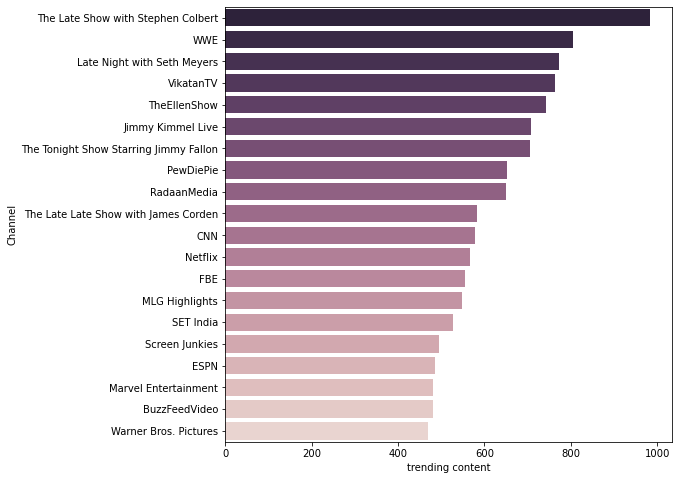

In [175]:
cdf = df.groupby("channel_title").size().reset_index(name="trending content") \
    .sort_values("trending content", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="trending content", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="trending content", ylabel="Channel")

### Combining the df with US category file (similar id category for all countries)

#### import data using python json module

In [176]:
import json 
with open('US_category_id.json','r') as f:
    category_data_us= json.loads(f.read())
#Normalizing the data
US_cat = pd.json_normalize(category_data_us,record_path='items')
US_cat.head()

##converting id to int for merging into df
US_cat['id']=US_cat['id'].astype(str).astype(int)

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [177]:
#merging df and category data
df = df.merge(US_cat,how ='left',left_on= 'category_id',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})

#removing unnecessary columns post merge
df.drop(columns=['thumbnail_link','kind','etag','id','snippet.assignable',\
                           'snippet.channelId'], axis='columns',inplace=True)

df.head()
df.shape

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,Music


(375942, 17)

In [178]:
df_EDA=df.copy()

In [179]:
df_EDA['publish_time'] = pd.to_datetime(df_EDA['publish_time'])

In [180]:
#Separate the date from publishing time
df_EDA['publish_date'] = df_EDA.publish_time.apply(lambda x: x.date())

In [181]:
df_EDA['publish_date'] = pd.to_datetime(df_EDA['publish_date'])

In [182]:
df_EDA['trending_date'] = pd.to_datetime(df_EDA['trending_date'], format = '%y.%d.%m')

In [183]:
#Calculating the trending days number
df_EDA['trending_day_no'] = df_EDA.groupby(['video_id','region','title'])["trending_date"].rank('first',ascending=True)

In [184]:
#Creating dataframe with unique video_id for one region 
df_analysis = df_EDA.groupby(['video_id','title','channel_title','region','publish_date','publish_time','category_name'],\
                     as_index=False).agg({'views': 'max','likes':'max','dislikes':'max',\
                                          'comment_count':'max','trending_date':'max','trending_day_no':'max'})\
                                    .rename(columns={'trending_day_no':'total_trending_days'\
                                                    ,'trending_date':'trending_date_max'}) 

In [185]:
df_analysis.shape

(210675, 13)

In [186]:
df_analysis.head()

,video_id,title,channel_title,region,publish_date,publish_time,category_name,views,likes,dislikes,comment_count,trending_date_max,total_trending_days
0,#NAME?,#1【ホラー】弟者「LIMBO」【2BRO.】,兄者弟者,JP,2018-05-28,2018-05-28 14:00:00+00:00,Gaming,323474,2921,134,393,2018-05-30,3.000
1,#NAME?,#2 未来配信 －未来人は約束はしないさ－ 夕陽リリ,Yuhi Riri Official,JP,2018-05-28,2018-05-28 17:08:55+00:00,Entertainment,28869,1404,28,16,2018-05-29,1.000
2,#NAME?,"#4【生放送】ドンピシャ,ぺちゃんこ,鉄塔,標準のEA SPORTS UFC 3【三人称+1】",SANNINSHOW,JP,2018-03-07,2018-03-07 09:00:00+00:00,Gaming,86005,1483,37,190,2018-03-08,2.000
3,#NAME?,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,IN,2018-06-12,2018-06-12 05:44:19+00:00,Entertainment,1014376,5974,1414,1132,2018-06-14,4.000
4,#NAME?,#MahaaNews Sensation: #MaheshKathi Leaves From...,Mahaa News,IN,2018-01-07,2018-01-07 16:00:29+00:00,News & Politics,1912194,23861,2492,9520,2018-01-12,2.000


# Historical Analysis

## Correlation between different variables

In [187]:
df_EDA.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_day_no
category_id,1.000,-0.134,-0.150,-0.032,-0.069,0.032,0.020,-0.028,-0.153
views,-0.134,1.000,0.778,0.422,0.510,-0.008,-0.012,0.008,0.359
likes,-0.150,0.778,1.000,0.454,0.794,-0.029,-0.032,0.007,0.297
dislikes,-0.032,0.422,0.454,1.000,0.705,-0.008,-0.013,0.005,0.119
comment_count,-0.069,0.510,0.794,0.705,1.000,-0.025,-0.021,0.003,0.166
comments_disabled,0.032,-0.008,-0.029,-0.008,-0.025,1.000,0.286,-0.004,-0.012
ratings_disabled,0.020,-0.012,-0.032,-0.013,-0.021,0.286,1.000,-0.004,-0.031
video_error_or_removed,-0.028,0.008,0.007,0.005,0.003,-0.004,-0.004,1.000,0.016
trending_day_no,-0.153,0.359,0.297,0.119,0.166,-0.012,-0.031,0.016,1.000


<AxesSubplot:xlabel='count', ylabel='region'>

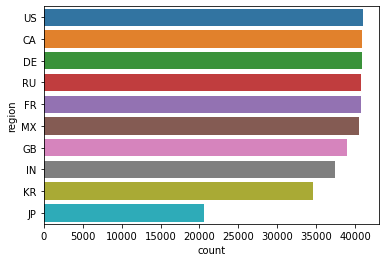

In [188]:
#first how many videos trended by region first
sns.countplot(data=df_EDA,y='region',order=df_EDA.region.value_counts().iloc[:10].index)

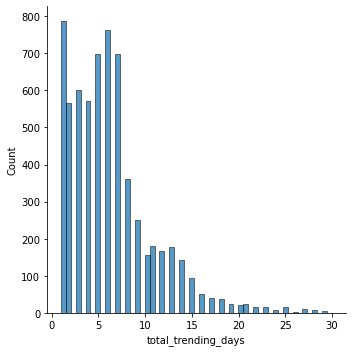

In [189]:
#US videos trending days
sns.displot(data=df_analysis[df_analysis.region=="US"],x="total_trending_days")

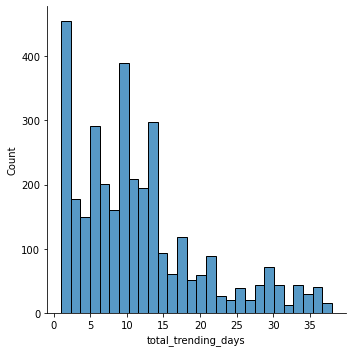

In [190]:
#Great Britain videos trending days
sns.displot(data=df_analysis[df_analysis.region=="GB"],x="total_trending_days")

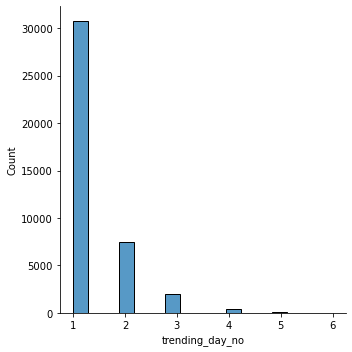

In [191]:
#France videos trending days
sns.displot(data=df_EDA[df_EDA.region=="FR"],x="trending_day_no")

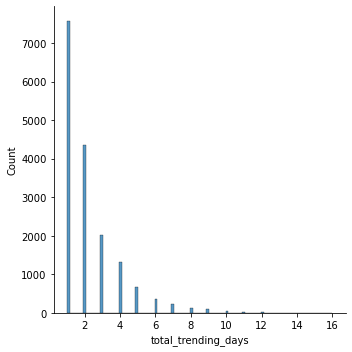

In [192]:
#India videos trending days
sns.displot(data=df_analysis[df_analysis.region=="IN"],x="total_trending_days")

### Trending categories

<div class="alert alert-block alert-success"> Oberservation: Entertainment is the most popular categories in most countries</div>

<AxesSubplot:xlabel='count', ylabel='category_name'>

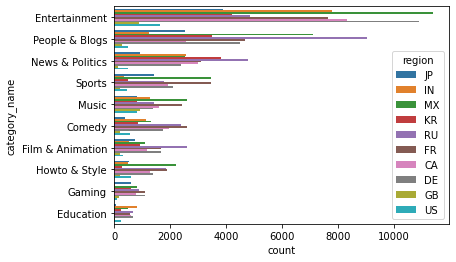

In [193]:
#All countries
sns.countplot(y='category_name',data=df_analysis,hue='region',\
              order=df_analysis.category_name.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='category_name'>

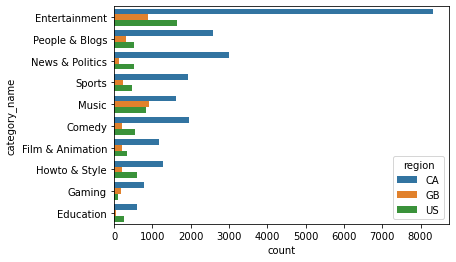

In [194]:
#Three English speaking countries
sns.countplot(y='category_name',data=df_analysis,hue='region',\
              order=df_analysis.category_name.value_counts().iloc[:10].index,hue_order=['CA','GB','US'])

<div class="alert alert-block alert-success"> Observation: for USA, the entertainment category is most popular. For Great Britain, music is the most popular category.</div>

<AxesSubplot:xlabel='count', ylabel='category_name'>

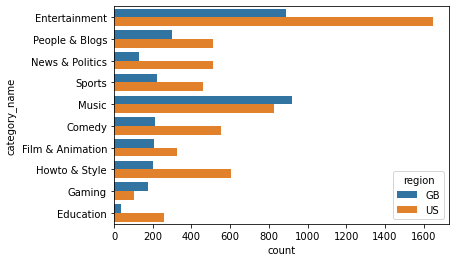

In [195]:
sns.countplot(y='category_name',data=df_analysis,hue='region',\
              order=df_analysis.category_name.value_counts().iloc[:10].index,hue_order=['GB','US'])

# Historical Analysis

In [196]:
df_num=df[['likes','dislikes','views','comment_count','publish_time','trending_date']]

<div class="alert alert-block alert-success"> Observation: 
    
    - Views and likes are correlated but not linear correlation. 
    
    - Both Likes and dislikes correlate with comments. 
    
    - As expected, Likes and dislikes dont have correlation 
</div>

array([[<AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='likes'>,
        <AxesSubplot:xlabel='views', ylabel='likes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='likes'>],
       [<AxesSubplot:xlabel='likes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='dislikes'>,
        <AxesSubplot:xlabel='views', ylabel='dislikes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='dislikes'>],
       [<AxesSubplot:xlabel='likes', ylabel='views'>,
        <AxesSubplot:xlabel='dislikes', ylabel='views'>,
        <AxesSubplot:xlabel='views', ylabel='views'>,
        <AxesSubplot:xlabel='comment_count', ylabel='views'>],
       [<AxesSubplot:xlabel='likes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='dislikes', ylabel='comment_count'>,
        <AxesSubplot:xlabel='views', ylabel='comment_count'>,
        <AxesSubplot:xlabel='comment_count', ylabel='comment_count'>]],
      dtype=object)

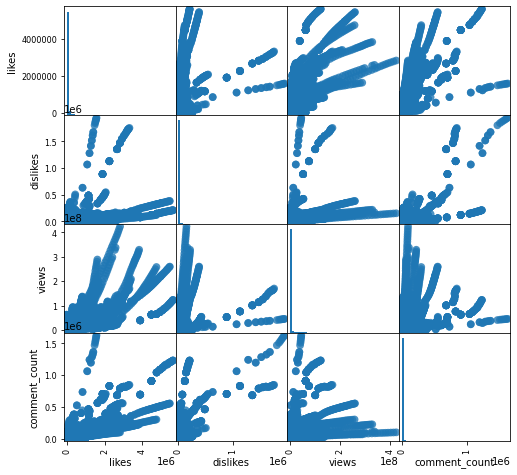

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df_num, figsize=(8, 8),
                           marker='o', hist_kwds={'bins': 50}, s=60,
                           alpha=.8)

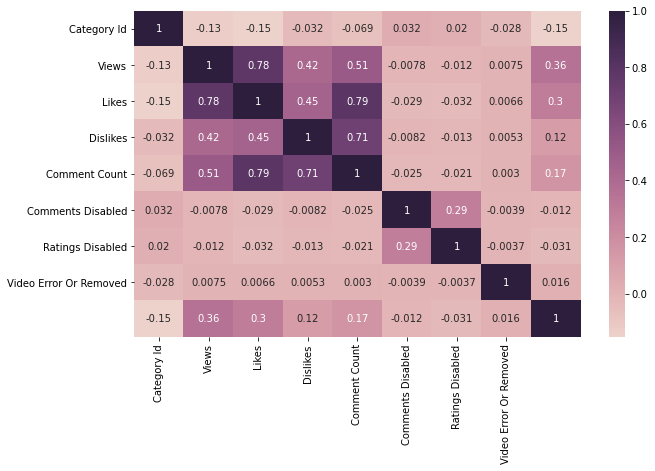

In [198]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df_EDA.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, \
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

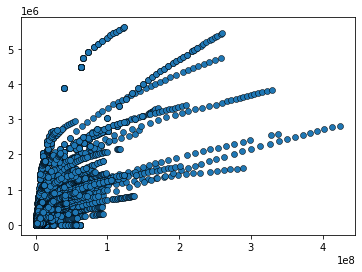

In [199]:
plt.scatter(x=df_EDA['views'],y=df_EDA['likes'], edgecolors="#000000", linewidths=0.5)

<ipython-input-200-61f47f0e10ea>:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

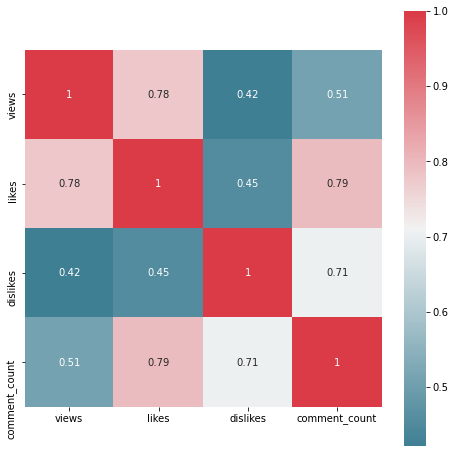

In [200]:
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df_EDA[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

## Single Day Trending VS Multiple Days Trending:10 countries trending days

In [73]:
len(df_analysis[df_analysis.total_trending_days==1])

140822

In [74]:
len(df_analysis[(1<df_analysis.total_trending_days)&(df_analysis.total_trending_days<=5)])

62710

In [75]:
len(df_analysis[(6<df_analysis.total_trending_days)&(df_analysis.total_trending_days<=10)])

2837

In [76]:
len(df_analysis[(11<df_analysis.total_trending_days)&(df_analysis.total_trending_days<=20)])

1650

In [77]:
len(df_analysis[df_analysis.total_trending_days>21])

528

<div class="alert alert-block alert-success">
Observation: More than 70% videos trend only 1 day.
</div>

In [201]:
df_trending= df_EDA.copy()

In [202]:
df_trending.drop(columns={'publish_time','tags','ratings_disabled','comments_disabled',\
                           'description','video_error_or_removed','category_id'},axis=1,inplace=True)

In [203]:
df_trending['publish_to_trend']=(df_trending.trending_date - df_trending2.publish_date).dt.days

In [204]:
df_trending['publish_to_trend_range']= pd.cut(df_trending.publish_to_trend, bins=[0,1,5,10,20,6000])

In [205]:
df_trending_c=df_trending.copy()

In [206]:
df_trending_c=df_trending_c.sort_values(by='trending_date',ascending=True)

In [207]:
df_trending_dif=df_trending_c.drop_duplicates(subset='video_id', keep='first')

In [208]:
df_trending_dif.video_id.nunique()

184287

In [209]:
df_trending_dif.head(1)

,video_id,trending_date,title,channel_title,views,likes,dislikes,comment_count,region,category_name,publish_date,trending_day_no,publish_to_trend,publish_to_trend_range
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,17158579,787425,43420,125882,CA,Music,2017-11-10,1.000,4,"(1, 5]"


<div class="alert alert-block alert-success">
Observation: Average days it takes from publish to first trend is 3.45 days
</div>

In [152]:
df_trending_dif.publish_to_trend.mean()

3.4523921926126095

In [153]:
df_trending_dif.publish_to_trend.median()

1.0

## How many videos only trend one day?

## Belated Popularity

<div class="alert alert-block alert-success">
Observation: There are a few outlier videos that trended more than 10 years after being published. The two top ones are:

    - The Budweiser Wassup commercial (video_id='MJO3FmmFuh4') took >11 years (4215 days) to trend! This is because Budweiser ran another commercial in 2017, and people went back and watched the older one.
    
    - Jeffrey Lewis song (video_id='tP_Dk81f9fg) trended for 9 days after >10 years (3982 days)!
</div>

In [212]:
df_trending_dif.nlargest(5,columns="publish_to_trend")

,video_id,trending_date,title,channel_title,views,likes,dislikes,comment_count,region,category_name,publish_date,trending_day_no,publish_to_trend,publish_to_trend_range
351287,MJO3FmmFuh4,2018-02-05,Budweiser - Original Whazzup? ad,dannotv,258506,459,152,82,US,Entertainment,2006-07-23,1.000,4215,"(20, 6000]"
137099,tP_Dk81f9fg,2018-01-28,Jeffrey Lewis The Legend of The Fall,Dav hum,80158,333,2,24,GB,Music,2007-03-05,1.000,3982,"(20, 6000]"
136465,p9zTSvEpt_8,2018-01-25,Bill is Dead The Fall,georgegargan,81371,468,6,116,GB,Music,2007-06-25,1.000,3867,"(20, 6000]"
128065,rtQXLmkeOgo,2017-12-12,BBC TV Swap Shop Opening Titles & Clips,revoxy,82854,112,4,43,GB,Education,2007-12-03,1.000,3662,"(20, 6000]"
12443,hTSAyR3nOR0,2018-01-17,Dolores O'riordan - her house in Canada,nenuostabu,469232,1315,48,233,CA,Music,2008-01-13,1.000,3657,"(20, 6000]"


In [70]:
df[df.video_id=='MJO3FmmFuh4']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category_name
351287,MJO3FmmFuh4,18.05.02,Budweiser - Original Whazzup? ad,dannotv,24,2006-07-23T08:24:11.000Z,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,False,False,False,"Original Whazzup ad - however, there is a litt...",US,Entertainment


In [71]:
df[df.video_id=='tP_Dk81f9fg']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category_name
137099,tP_Dk81f9fg,18.28.01,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80158,333,2,24,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
137308,tP_Dk81f9fg,18.29.01,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80283,333,2,24,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
137525,tP_Dk81f9fg,18.30.01,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80354,333,2,24,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
137735,tP_Dk81f9fg,18.31.01,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80515,336,2,25,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
137959,tP_Dk81f9fg,18.01.02,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80634,338,2,25,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
138175,tP_Dk81f9fg,18.02.02,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80684,339,2,25,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
138392,tP_Dk81f9fg,18.03.02,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80723,339,2,25,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
138605,tP_Dk81f9fg,18.04.02,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80779,339,2,25,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music
138816,tP_Dk81f9fg,18.05.02,Jeffrey Lewis The Legend of The Fall,Dav hum,10,2007-03-05T16:23:55.000Z,"Jeffrey|""jack""|""Lewis""|""the""|""fall""",80828,340,2,25,False,False,False,Diaporama of Jeffrey Lewis low budget video ab...,GB,Music


## US longest Trending Videos' Impact Across other countries

In [78]:
US_longtrend=df_analysis[(df_analysis.region=="US")&(df_analysis.total_trending_days>28)].video_id.values

In [79]:
df_analysis[df_analysis.video_id.isin(US_longtrend)].pivot(index=['video_id','title','channel_title','category_name'],\
     columns="region",values="total_trending_days").sort_values(by="US",ascending=False)

,,,region,CA,DE,FR,GB,IN,JP,KR,MX,RU,US
video_id,title,channel_title,category_name,,,,,,,,,,
j4KvrAUjn6c,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,Entertainment,2.000,2.000,1.000,NaN,NaN,NaN,NaN,1.000,NaN,30.000
8h--kFui1JA,Sam Smith - Pray (Official Video) ft. Logic,SamSmithWorldVEVO,Music,4.000,2.000,2.000,37.000,NaN,NaN,NaN,2.000,NaN,29.000
NBSAQenU2Bk,Rooster Teeth Animated Adventures - Millie So Serious,Rooster Teeth,Film & Animation,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000
QBL8IRJ5yHU,Why I'm So Scared (being myself and crying too much),grav3yardgirl,Howto & Style,5.000,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000
iILJvqrAQ_w,Charlie Puth - BOY [Official Audio],Charlie Puth,Music,2.000,NaN,1.000,NaN,NaN,1.000,1.000,NaN,NaN,29.000
r-3iathMo7o,"The ULTIMATE $30,000 Gaming PC Setup",Unbox Therapy,Science & Technology,4.000,3.000,2.000,NaN,4.000,2.000,2.000,2.000,1.000,29.000
t4pRQ0jn23Q,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,Complex,Entertainment,5.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000


<div class="alert alert-block alert-success"> Observations: Most top trending videos do not have universal appeal as expected. [Exception: Gaming video]</div>

Next, we wanted to find out what people were watching in the trending categories in the 3 English-speaking countries in our dataset - USA, Great Britain, Canada. We will analyse word cloud for the Enteratinment and Music categories, which are top for these countries.

## What did US watch for entertainment, sports, news & politics and music?

Category: Entertainment


(-0.5, 399.5, 199.5, -0.5)

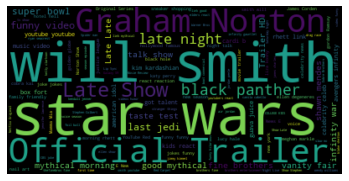

Category: Music


(-0.5, 399.5, 199.5, -0.5)

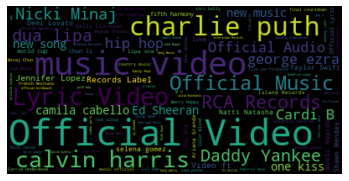

In [213]:
category_list = ['Entertainment','Music']
for category in category_list:
    print("Category: "+category)
    tag_text = " ".join(text for text in df_EDA.tags[(df_EDA.category_name == category )& (df_EDA.region == 'US')])
    title_text = " ".join(text for text in df_EDA.title[(df_EDA.category_name == category )& (df_EDA.region == 'US')])
    tag_title_text = tag_text + ' ' + title_text
    wordcloud = WordCloud().generate(tag_title_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## What did Great Britain watch for Entertainment','Music'?

Category: Entertainment


(-0.5, 399.5, 199.5, -0.5)

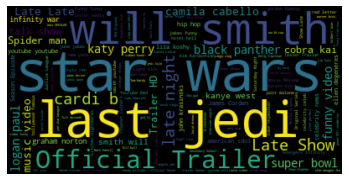

Category: Music


(-0.5, 399.5, 199.5, -0.5)

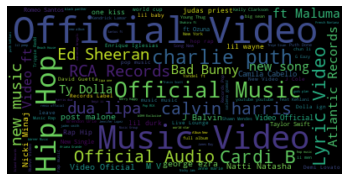

In [214]:
category_list = ['Entertainment','Music']
for category in category_list:
    print("Category: "+category)
    tag_text = " ".join(text for text in df_EDA.tags[(df_EDA.category_name == category )& (df_EDA.region == 'GB')])
    title_text = " ".join(text for text in df_EDA.title[(df_EDA.category_name == category )& (df_EDA.region == 'GB')])
    tag_title_text = tag_text + ' ' + title_text
    wordcloud = WordCloud().generate(tag_title_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## What did they watch in Canada?

Category: Entertainment


(-0.5, 399.5, 199.5, -0.5)

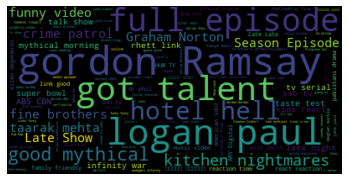

Category: Music


(-0.5, 399.5, 199.5, -0.5)

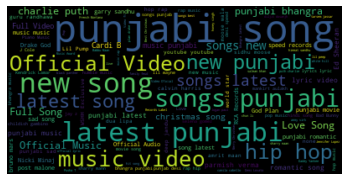

In [215]:
category_list = ['Entertainment', 'Music']
for category in category_list:
    print("Category: "+category)
    tag_text = " ".join(text for text in df_EDA.tags[(df_EDA.category_name == category )& (df_EDA.region == 'CA')])
    title_text = " ".join(text for text in df_EDA.title[(df_EDA.category_name == category )& (df_EDA.region == 'CA')])
    tag_title_text = tag_text + ' ' + title_text
    wordcloud = WordCloud().generate(tag_title_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

<div class="alert alert-block alert-success"> Observations: 
    
    - Both US and GB have similar tastes in Entertainment and Music. Star Wars, Will Smith and Graham Norton were soe of the most popular videos in 2017-18. For Music, Charlie Puth had most views.
    
    - Canada is a little different. For entertainment, it was more on Logan Paul and Gordon Ramsay. And, music was a lot of Punjabi songs (a regional language from India) 

</div>

## Time Series
We explored the peak times for trending videos in US in the top categories - Entertainment and Music.

In [83]:
df_US_NEW = df_EDA[df_EDA.region == 'US']
df_US_NEW = df_US_NEW.drop_duplicates(subset=['video_id'], keep='last')
df_US_category_counts = df_US_NEW.groupby(['trending_date', 'category_name'], as_index=False)['views'].sum()

In [84]:
df_US_category_counts['trending_date'] = pd.to_datetime(df_US_category_counts['trending_date']).dt.date
df_US_music_count = df_US_category_counts[df_US_category_counts.category_name == 'Music']
df_US_entertainment_count = df_US_category_counts[df_US_category_counts.category_name == 'Entertainment']

### Music Trend

In [218]:
#import fot plotly
import plotly.express as px

labels = {'views': 'View Count (Millions)', 'trending_date': 'Trending Date'}
fig = px.line(df_US_music_count, x='trending_date', y='views', title='View Count Time Series for category: Music (USA)', labels=labels)
fig.update_xaxes(rangeslider_visible=True)


In [221]:
#Top Videos that contributed to Music on May 14th, 2018 - Peak Day
df_US_NEW[(df_US_NEW.trending_date=="2018-05-14")&(df_US_NEW.category_name == 'Music')]\
.sort_values(by="views",ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category_name,publish_date,trending_day_no
369701,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20 04:00:03+00:00,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,US,Music,2018-04-20,20.000
369740,M4ZoCHID9GI,2018-05-14,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,10,2018-04-12 16:00:04+00:00,"The|""Weeknd""|""Call""|""Out""|""My""|""Name""",122544931,1427436,40837,55320,False,False,False,Call Out My Name (Official Video)Taken from th...,US,Music,2018-04-12,19.000
369655,LryQJ25CnKU,2018-05-14,Jennifer Lopez - El Anillo (Official Video),JenniferLopezVEVO,10,2018-04-27 13:00:06+00:00,"Jennifer Lopez El Anillo|""Jennifer Lopez El An...",41446137,502519,78095,36974,False,False,False,Jennifer Lopez – “El Anillo”NUEVO SENCILLO “E...,US,Music,2018-04-27,15.000
369736,SCq8n_hOcN8,2018-05-14,Nicki Minaj - Chun-Li (Vertical Video),Nicki Minaj,10,2018-04-14 05:44:40+00:00,"nicki|""minaj""|""nicki minaj 2018""|""nicki minaj""...",22918328,409234,35804,36436,False,False,False,Listen to Chun Li : https://nickiminaj.lnk.to/...,US,Music,2018-04-14,6.000
369667,ufynqs_COF4,2018-05-14,J. Cole - Kevin's Heart,J. Cole,10,2018-04-24 15:56:34+00:00,"j cole|""kod""|""cole""|""kevin's heart""|""kevin har...",18438586,487264,11915,28473,False,False,False,J. Cole –Kevin's Heart (Official Music Video)L...,US,Music,2018-04-24,18.000


### Entertainment Trend

In [222]:
labels = {'views': 'View Count (Millions)', 'trending_date': 'Trending Date'}
fig = px.line(df_US_entertainment_count, x='trending_date', y='views', title='View Count Time Series for category: Entertainment (USA)', labels=labels)
fig.update_xaxes(rangeslider_visible=True)


In [220]:
#Top Videos that contributed to Entertainment on May 14th, 2018 - Peak Day
df_US_NEW[(df_US_NEW.trending_date=="2018-05-14")&(df_US_NEW.category_name == 'Entertainment')]\
.sort_values(by="views",ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,region,category_name,publish_date,trending_day_no
369672,u9Mv98Gr5pY,2018-05-14,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24 03:45:03+00:00,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",59254638,1295189,47162,139879,False,False,False,We Are #Venom. 10.5.18One of Marvel's most eni...,US,Entertainment,2018-04-24,19.000
369677,rRr1qiJRsXk,2018-05-14,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,24,2018-04-24 07:58:08+00:00,"Sanju Teaser|""Official Teaser""|""Sanju Official...",48654951,811144,33051,48941,False,False,False,Few lives in our times are as dramatic and eni...,US,Entertainment,2018-04-24,18.000
369717,1FJD7jZqZEk,2018-05-14,Jurassic World: Fallen Kingdom - Final Trailer...,Universal Pictures,24,2018-04-18 15:00:10+00:00,[none],14723484,190948,7913,18386,False,False,False,Jurassic World: Fallen Kingdom In Theaters Jun...,US,Entertainment,2018-04-18,18.000
369734,JqfuKsoEEms,2018-05-14,Hotel Artemis | Official Trailer [HD] | Global...,Global Road Entertainment,24,2018-04-16 12:59:59+00:00,"Global Road|""Global Road Entertainment""|""Movie...",14118990,5790,593,628,False,False,False,"In HOTEL ARTEMIS, set in riot-torn, near-futur...",US,Entertainment,2018-04-16,6.000
369562,6Q0AazVu1Tc,2018-05-14,Donchez bags a GOLDEN BUZZER with his Wiggle a...,Britain's Got Talent,24,2018-05-05 19:29:19+00:00,"britain's got talent|""britains got talent""|""br...",7957820,110407,4211,0,True,False,False,We dare you not to sing and groove along with ...,US,Entertainment,2018-05-05,8.000


<div class="alert alert-block alert-success"> Observations: 
    
    - Music: On May 14th, 2018 when there were 454 Mn views, mostly it was contributed by Ariana Grande's "No Tears Left to Cry", the Weekend "Call out my name", Jennifer Lopez "El Anillo"
    
    - Entertainment: The 3 trailers contributed to most views on May 14th 2018 when there were overall 210 Mn views. Venom, Jurassic World and Hotel Artemis from Hollywood and one Hindi movie trended.
    
    Both the peak days for Entertainment and Music could be because users came onto platform for watching one and ended up exploring other categories too. However, since we do not have user level data, we can not conclude the same.

</div>

# Data Driven Tips for Future Youtubers

## 1. When to publish a video?

<div class="alert alert-block alert-success"> Observations: We can see that if you publish your videos on Friday and Thursday between 2pm to 6pm,  there is higher chance to become trending videos. Most of videos take short time to trend, and since people usually focus on the their work weekday, they spend more time on Youtube on weekends.

</div>

### Publishing day

In [90]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))

In [91]:
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])

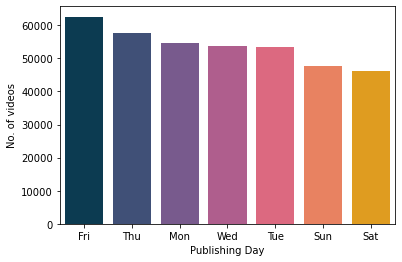

In [92]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

### Publishing hour

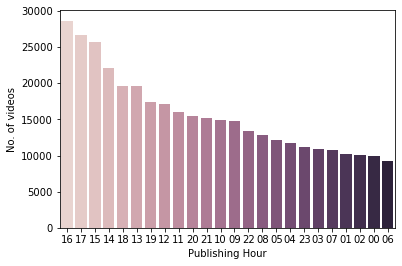

In [93]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

## 2. Title length VS Views

<div class="alert alert-block alert-success"> Observations: Most of the trending videos have a title length from 30 to 60 letters, very long or very short title doesn’t ensure the video catch more attention. There is no specific correlation between the views and title length.

</div>

/Users/sandhyanallarkkiniyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



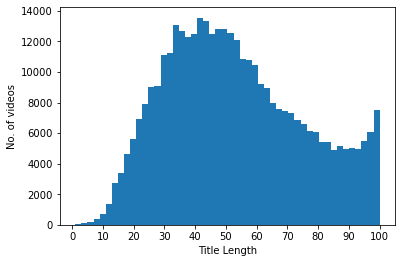

In [94]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

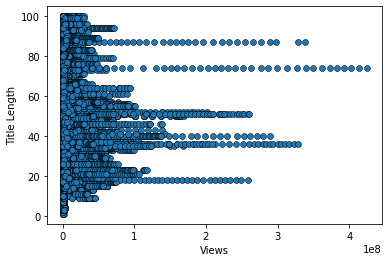

In [95]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'],edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

## 3. How many trending video titles contain capitalized word?
Now we want to see how many trending video titles contain at least a capitalized word. To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise

<div class="alert alert-block alert-success"> Observations: About 46% of titles have capitalized words in Title and remaining 53% do not. There is no specific correlation between the capitalized word in title and trending videos.

</div>

In [96]:
df_english=df[(df.region=='CA')|(df.region=='GB')|(df.region=='US')]

<ipython-input-97-a1d0c7b72ab5>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



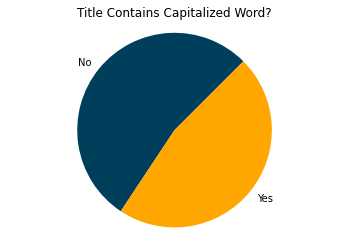

In [97]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df_english["contains_capitalized"] = df_english["title"].apply(contains_capitalized_word)

value_counts = df_english["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [98]:
df_english["contains_capitalized"].value_counts(normalize=True)

False   0.532
True    0.468
Name: contains_capitalized, dtype: float64

In [224]:
print("The mean views for trending videos without capitalized word in title",\
      df_english[df_english.contains_capitalized==False].views.mean())
print("The mean views for trending videos with capitalized word in title",\
df_english[df_english.contains_capitalized==True].views.mean())

The views for trending videos without capitalized word in title 3481522.316586984
The views for trending videos with capitalized word in title 2654625.6324624554


In [226]:
print("The mean likes for trending videos without capitalized word in title",\
df_english[df_english.contains_capitalized==False].likes.mean())
print("The mean likes for trending videos with capitalized word in title",\
df_english[df_english.contains_capitalized==True].likes.mean())

The mean likes for trending videos without capitalized word in title 86163.90844533038
The mean likes for trending videos with capitalized word in title 77148.69133072719


In [258]:
print("The mean dislikes for trending videos without capitalized word in title",\
df_english[df_english.contains_capitalized==False].dislikes.mean())
print("The mean dislikes for trending videos with capitalized word in title {:.2f}".\
      df_english[df_english.contains_capitalized==True].dislikes.mean())

The mean dislikes for trending videos without capitalized word in title 5255.757821624905


AttributeError: 'str' object has no attribute 'df_english'

In [233]:
print("The mean comments count for trending videos without capitalized word in title",\
df_english[df_english.contains_capitalized==False].comment_count.mean())
print("The mean comments count for trending videos with capitalized word in title",\
      df_english[df_english.contains_capitalized==True].comment_count.mean())

The mean comments count for trending videos without capitalized word in title 8575.115132449815
The mean comments count for trending videos with capitalized word in title 9034.767233297365


## 4. Sentiment Analysis for Description, Title and Tags

We analyzed the 3 english speaking countries' text to see what the sentiment is

<div class="alert alert-block alert-success"> Observations: When we analyzed each of title, tags, description separateley, we found that positive words can catch more attention from people. 
    
    - Description: more positive words
    - Title: more neutral
    - Tags: more positive

</div>

In [ ]:
bloblist_desc = list()

df_en_descr_str=df_english['description'].astype(str)
for row in df_en_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_en_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_en_polarity_desc):
    if df_en_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_en_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_en_polarity_desc['Sentiment_Type'] = df_en_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_en_polarity_desc)

In [ ]:
bloblist_tags = list()

df_en_tags_str=df_english['tags']
for row in df_en_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_en_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_en_polarity_tags):
    if df_en_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_en_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_en_polarity_tags['Sentiment_Type'] = df_en_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_en_polarity_tags)

In [ ]:
bloblist_title = list()

df_en_title_str=df_english['title']
for row in df_en_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_en_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_en_polarity_title):
    if df_en_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_en_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_en_polarity_title['Sentiment_Type'] = df_en_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_en_polarity_title)

## 5. Which Categories Trend Longer?

<div class="alert alert-block alert-success"> Observations: We did a heatmap to see which category of videos has longer trending duration. We find the highest five are: Entertainment, Music, Comedy, People & Blogs, News & politics. 
   <br> Recommendation: For new youtubers, they can film more videos like these in order to get high chance to become trending videos. Sports, games and shows, trailers have a short attention span. They are easily forgotten by people. </br>

</div>

In [ ]:
cat_trend_duration= df_analysis.groupby(['category_name','total_trending_days']).count()['video_id'].unstack().clip(upper=300)
plt.figure(figsize=(10,10))
sns.heatmap(cat_trend_duration, cmap='plasma_r')
plt.title("Category v/s Trending Duration")

# ML Insights

We used two machine learning techniques:
1. To predict which category a video belongs to based on the text
2. To predict number of days a video will trend based on views/likes/comments, category, publish time

## Part 1: Classification for Categories

Data Preprocesing: for classification of categories using text columns: title, tags, description

- Used 3 English-speaking countries: USA, Great Britain and Canada
- Drop duplicated video_id
- df.description.fillna('')
- Removed non English words, links and stop words
- Combined the cleaned text from title, tags and description before final classification
- Used top 6 categories with >2000 videos to keep dataset balanced

Running Machine Learning Models:
- Split Training - Test 
- Random Forest using simple bag-of-words Count Vectorization method
- Random Forest: using TF-IDF Vectorizer method

<div class="alert alert-block alert-success"> Observations: The Precision and Recall for the top 6 categories - Comedy, Entertainment, Music, News & politics, People & blogs, Sports is very high for the Test set at >85%.
   <br></br><br> Recommendation: The Youtube website can use this prediction to analyse the text real time and recommend categories to content creators. they can also show statistics related to the categories, so that the content creators know the reach of their videos and potential revenue. </br>
</div>

In [234]:
#Replacing NaNs with blanks
df_english.description.fillna('')

0         Eminem's new track Walk on Water ft. Beyoncé i...
1         STill got a lot of packages. Probably will las...
2         WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3         I know it's been a while since we did this sho...
4         🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
                                ...                        
375937       The Cat Who Caught the Laser - Aaron's Animals
375938                                                     
375939    I had so much fun transforming Safiyas hair in...
375940    How Black Panther Should Have EndedWatch More ...
375941    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 120746, dtype: object

In [801]:
df_english.description.fillna('').isna().any()

False

In [802]:
df_english.description.fillna('',inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [803]:
#checking
df_english.tags.sample(4)

17970     Toronto Star|"Toronto"|"Star"|"starvideo"|"Pye...
361503    sonic|"sonic the hedgehog"|"sonic mania advent...
19792     news|"haber"|"breaking news"|"أخبار عاجلة"|"по...
367007    The Mercury News|"Bay Area"|"San Jose"|"Califo...
Name: tags, dtype: object

In [804]:
df_english.title.sample(4)

136800    Rejjie Snow - Egyptian Luvr (feat. Aminé & Dan...
159508    Kanye West on His New Album 'Ye' At His Album ...
129382    SOULCALIBUR VI Announcement Trailer | PS4, XB1...
363672                            REAL LIFE MORNING ROUTINE
Name: title, dtype: object

In [805]:
df_english.description.sample(4)

140177    Stream / Download Fine Line: https://Mabel.lnk...
125749    Noel Gallagher's High Flying Birds - ‘If Love ...
1122      Elon Musk presents Tesla Roadster 2020 within ...
22102     CRAZIEST THING I'VE EVER DONE\nStart Your Phil...
Name: description, dtype: object

In [806]:
def isEnglish(s):
    try:
        s.encode('ascii')
    except UnicodeEncodeError:
        return False
    else:
        return True

In [762]:
def removeNonEnglishWords(text):
    filteredText = []
    for word in text.split():
        if isEnglish(word):
            filteredText.append(word)
    
    return " ".join(filteredText)

In [807]:
df_english['isEnglish'] = df_english.description.apply(lambda s: isEnglish(s))

<ipython-input-807-d2528d0f1fa5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [808]:
df_english.isEnglish.value_counts()

False    68718
True     52028
Name: isEnglish, dtype: int64

In [809]:
df_english[df_english.isEnglish==False].description

0         Eminem's new track Walk on Water ft. Beyoncé i...
1         STill got a lot of packages. Probably will las...
2         WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
4         🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5         ► Follow for News! - https://twitter.com/KEEMS...
                                ...                        
375928    Chun-Li (Live on SNL / 2018)Song Available Her...
375931    Daddy Yankee - Hielo (Video Oficial)Spotify: h...
375934    Stream + Download:https://wmna.sh/speechlessht...
375939    I had so much fun transforming Safiyas hair in...
375941    Call of Duty: Black Ops 4 Multiplayer raises t...
Name: description, Length: 68718, dtype: object

In [811]:
#adding a new feature clean_description into the dataframe
df_english['clean_description']= df_english.description.apply(removeNonEnglishWords)

<ipython-input-811-57b423939a49>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [812]:
df_english[['description','clean_description']].sample(5)

,description,clean_description
363118,BUY/LISTEN : http://guetta.co/flames\nDirector...,BUY/LISTEN : http://guetta.co/flames\nDirector...
373832,Nicky Jam feat. Will Smith & Era Istrefi - Liv...,Nicky Jam feat. Will Smith & Era Istrefi - Liv...
5544,Swan et Néo sont venus passer l'après-midi ave...,Swan et sont venus passer avec moi pour appren...
150463,“Pineapple” de Karol G está disponible ya: htt...,de Karol G disponible ya: https://UMLE.lnk.to/...
35907,A man's leg has been shattered by heavy lava s...,A man's leg has been shattered by heavy lava s...


In [813]:
df_english.drop(columns=['description','isEnglish'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [814]:
df_english['isEnglish'] = df_english.tags.apply(lambda s: isEnglish(s))
df_english[df_english.isEnglish==False].tags.count()

<ipython-input-814-43036b111fec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



13482

In [815]:
df_english['clean_tags']= df_english.tags.apply(removeNonEnglishWords)

<ipython-input-815-378936375806>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [816]:
df_english.drop(columns=['isEnglish','tags'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [817]:
df_english['isEnglish'] = df_english.title.apply(lambda s: isEnglish(s))
df_english[df_english.isEnglish==False].title.count()

<ipython-input-817-b845213c06f2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



15651

In [818]:
df_english['clean_title']= df_english.title.apply(removeNonEnglishWords)

<ipython-input-818-01d622bf1459>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [819]:
df_english.drop(columns=['isEnglish','title'],axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [820]:
#remove links from the description
df_english.clean_description= df_english.clean_description.str.replace('http\S+|www.\S+',''\
                                     ,regex=True).str.replace('\r+',''\
                                     ,regex= True).str.lower()
#removing Punctuation from description
df_english.clean_description = df_english.clean_description.str.replace(r'[^\w\s]+', '')

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-820-c39e068d24b2>:6: FutureWarning:

The default value of regex will change from True to False in a future version.



In [821]:
#replacing | from tags with a space and converting the text to lowercase
df_english.clean_tags= df_english.clean_tags.str.replace('|', ' ').str.lower()
#removing punctuation if any from tags
df_english.clean_tags =df_english.clean_tags.str.replace(r'[^\w\s]+', '')
#Replacing None in tags to ''
df_english.clean_tags = df_english.clean_tags.str.replace('none','')

<ipython-input-821-5ca0b9c8f7f7>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-821-5ca0b9c8f7f7>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [822]:
#replacing | from title with a space and converting the text to lowercase
df_english.clean_title= df_english.clean_title.str.replace('|', ' ').str.lower()
#remove links from the title
df_english.clean_title= df_english.clean_title.str.replace('http\S+|www.\S+',''\
                                     ,regex=True).str.replace('\r+',''\
                                     ,regex= True).str.lower()
#removing punctuation if any from title
df_english.clean_title = df_english.clean_title.str.replace(r'[^\w\s]+', '')

<ipython-input-822-95fef6754cc0>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-822-95fef6754cc0>:8: FutureWarning:

The default value of regex will change from True to False in a future version.



In [823]:
# Combining all text data in a single column:

df_english['All_text'] = df_english.clean_description + ' ' + df_english.clean_tags + ' ' + df_english.clean_title

<ipython-input-823-8c47400da819>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Defining a function to remove stop words and perform word stemming(which converts word into it's root form)

In [780]:
import nltk 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
def preprocessing(text):
    stemmer = PorterStemmer()
    processed_text = ''
    for word in text.split():
        if not word in ENGLISH_STOP_WORDS:
            processed_text += stemmer.stem(word) + " "

    return processed_text

In [824]:
df_english['All_text'] = df_english['All_text'].apply(preprocessing)

<ipython-input-824-e60f19f64017>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [825]:
df_english.head(1)

,video_id,trending_date,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,...,region,category_name,title_length,publishing_day,publishing_hour,contains_capitalized,clean_description,clean_tags,clean_title,All_text
0,n1WpP7iowLc,17.14.11,EminemVEVO,10,2017-11-10T17:00:03.000Z,17158579,787425,43420,125882,False,...,CA,Music,42,Fri,17,False,eminems new track walk on water ft is availabl...,eminem walk on water aftermathshadyinterscope rap,eminem walk on water audio ft,eminem new track walk water ft avail nplaylist...


In [826]:
df_english.category_name.value_counts()

Entertainment            32539
Music                    23957
People & Blogs           10241
Comedy                    9058
Howto & Style             8081
News & Politics           7871
Film & Animation          6982
Sports                    6868
Science & Technology      4074
Gaming                    3949
Education                 3104
Pets & Animals            1823
Travel & Events            890
Autos & Vehicles           881
Nonprofits & Activism      221
Shows                      201
Movies                       6
Name: category_name, dtype: int64

## Doing prediction for categories with higher value counts to keep the dataset balanced

In [827]:
#Filtering top 6 categories
df_english_filtered = df_english[df_english.category_name.isin(['Entertainment', 'Sports', 'Music', 'Comedy', \
                                        'People & Blogs','News & Politics'])]

In [828]:
X = df_english_filtered.All_text

In [829]:
Y = df_english_filtered.category_name

In [830]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

### Bag of Words Model: It is representation of text that describes the occurence of words within a document. We use this to convert text into numerical representation and use it in the classification model

In [831]:
# Applying bag of words to features in training and testing data
bag_of_words_creator = CountVectorizer()
X_train_bow = bag_of_words_creator.fit_transform(X_train)
x_test_bow = bag_of_words_creator.transform(x_test)

In [832]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train_bow,Y_train)

RandomForestClassifier(random_state=0)

In [833]:
y_pred = cl.predict(x_test_bow)

In [834]:
confusion_matrix(y_test,y_pred)

array([[2622,   70,    5,   14,   10,    2],
       [  15, 9601,   31,   62,   26,    4],
       [   4,   31, 7223,    1,   13,    2],
       [   3,   62,    4, 2261,   26,    4],
       [  12,  135,   11,   96, 2736,   19],
       [   2,   27,    7,    7,   14, 1999]])

In [835]:
print(met.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

         Comedy       0.99      0.96      0.97      2723
  Entertainment       0.97      0.99      0.98      9739
          Music       0.99      0.99      0.99      7274
News & Politics       0.93      0.96      0.94      2360
 People & Blogs       0.97      0.91      0.94      3009
         Sports       0.98      0.97      0.98      2056

       accuracy                           0.97     27161
      macro avg       0.97      0.96      0.97     27161
   weighted avg       0.97      0.97      0.97     27161



#### Since we are predicting multiclass, we cannot calculate AUC acore in our scenario

#### TFIDF assigns weight to every word depending on how unique a word is to a given document. Weight of every word is proportional to the frequency of that word in it's own document/text and inversly proportional to occurence in the other documents/texts

In [836]:
tfidf_creator = TfidfVectorizer()
X_train_tfidf = tfidf_creator.fit_transform(X_train)
x_test_tfidf = tfidf_creator.transform(x_test)

In [837]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train_tfidf,Y_train)

RandomForestClassifier(random_state=0)

In [838]:
y_pred = cl.predict(x_test_tfidf)

In [839]:
confusion_matrix(y_test,y_pred)

array([[2625,   68,    6,   14,    8,    2],
       [  12, 9615,   29,   59,   21,    3],
       [   2,   33, 7224,    5,    8,    2],
       [   3,   72,    4, 2264,   14,    3],
       [  15,  150,   13,   96, 2715,   20],
       [   2,   31,    9,    7,   11, 1996]])

In [840]:
print(met.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

         Comedy       0.99      0.96      0.98      2723
  Entertainment       0.96      0.99      0.98      9739
          Music       0.99      0.99      0.99      7274
News & Politics       0.93      0.96      0.94      2360
 People & Blogs       0.98      0.90      0.94      3009
         Sports       0.99      0.97      0.98      2056

       accuracy                           0.97     27161
      macro avg       0.97      0.96      0.97     27161
   weighted avg       0.97      0.97      0.97     27161



### Youtube can use this model to recommend the category to the users by doing real time analysis on title, tag and description while they are uploading their videos

# ML part 2: Predict the total trending days

Since we need to predict the total trending days, which is a continuous variable, we will use Regression.

Dependent Variable: Total Trending Days  

Independent Variables (convert all to numerical):
- Number of Views, Likes, Dislikes, Comments
- Publish Time: split to Year, Month, Date, Hour
- Categories:Convert to dummy variables
- Country:Convert to dummy variables

<div class="alert alert-block alert-success"> Observations: 
<br></br>
<br><b>Positive Impact on Trending Days:</b>
<br>Views & Likes</br>
<br>Published year, month, hour</br>
<br>Categories: Movies, Music, Comedy, Film & Animation, Gaming, Travel</br>
<br>Region: US, Britain</br>
<br></br>
<br><b>Negative Impact on Trending Days:</b>
<br>Dislikes and unusually, Comments!</br>
<br>Published week</br>
<br>Categories: News, Sports, Shows, Automobiles, Pets, Education, Entertainment</br>
<br>Region: Rest - Canada, India, France, Japan, Russia, S.Korea, Germany</br>
<br></br>
<br><b>Recommendation:</b> Youtube can use this to predict the trending potential and give recommendations to content creators. Then, channels could estimate total days their video could trend based on action the video is receiving.
</br>
</div>

In [235]:
df_ml=df_analysis.copy()

In [236]:
#Splitting publish date into year, month, hour
df_ml['published_year'] = df_ml.publish_time.dt.year
df_ml['published_month'] = df_ml.publish_time.dt.month
df_ml['published_week'] = df_ml.publish_time.dt.isocalendar().week
df_ml['published_day'] = df_ml.publish_time.dt.day
df_ml['published_hour'] = df_ml.publish_time.dt.hour

In [237]:
#getting dummies of region and category
df_ml = pd.get_dummies(df_ml, columns=['region','category_name'])

In [238]:
df_ml.drop(columns=['video_id','title','channel_title', 'trending_date_max', 'publish_date',\
                    'publish_time'],inplace=True)

In [239]:
X = df_ml.drop('total_trending_days',axis=1)
y = df_ml.total_trending_days

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                            test_size=0.2,random_state=0)

In [251]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [252]:
#Checking model fit on training data
print('linear model coeff (w): {}'
     .format(lin_reg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(lin_reg.intercept_))
print('R-squared score: {:.3f}'
     .format(lin_reg.score(X_train,y_train)))

linear model coeff (w): [ 1.30497546e-07  1.10379429e-06 -3.09988426e-06 -5.69864637e-06
  4.08340483e-01  3.06605115e-01 -6.39611401e-02  1.38011020e-02
  4.03558283e-03 -1.36717201e+00 -1.59760359e+00 -1.63884545e+00
  7.93666941e+00 -7.51333959e-01 -1.41566141e+00 -8.15854204e-01
 -1.74605797e+00 -1.75613013e+00  3.15198931e+00 -1.52555252e-01
  1.27970386e-01 -1.64316642e-01 -8.79923467e-02  6.03513115e-02
  1.83183718e-02 -1.15368504e-01  8.45967337e-01  2.56847378e-01
 -1.67861184e-01 -1.02683366e-01 -9.40758355e-02 -3.17777271e-02
 -5.81684222e-02 -2.32500052e-01 -2.25371255e-01  8.46117572e-02
  3.86040442e-02]
linear model intercept (b): -821.504
R-squared score: 0.528


In [253]:
#testing
y_pred = lin_reg.predict(X_test)

In [254]:
#RMSE
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_mad = (y_pred-y_test).abs().mean()

print('Mean Squared error: {:.3f}'.format(lin_mse))
print('Root Mean Squared error: {:.3f}'.format(lin_rmse))
print('Mean Absolute Deviation: {:.3f}'.format(lin_mad))

Mean Squared error: 2.391
Root Mean Squared error: 1.546
Mean Absolute Deviation: 0.725


In [243]:
print("Coefficients: \n", lin_reg.coef_)

Coefficients: 
 [ 1.30497546e-07  1.10379429e-06 -3.09988426e-06 -5.69864637e-06
  4.08340483e-01  3.06605115e-01 -6.39611401e-02  1.38011020e-02
  4.03558283e-03 -1.36717201e+00 -1.59760359e+00 -1.63884545e+00
  7.93666941e+00 -7.51333959e-01 -1.41566141e+00 -8.15854204e-01
 -1.74605797e+00 -1.75613013e+00  3.15198931e+00 -1.52555252e-01
  1.27970386e-01 -1.64316642e-01 -8.79923467e-02  6.03513115e-02
  1.83183718e-02 -1.15368504e-01  8.45967337e-01  2.56847378e-01
 -1.67861184e-01 -1.02683366e-01 -9.40758355e-02 -3.17777271e-02
 -5.81684222e-02 -2.32500052e-01 -2.25371255e-01  8.46117572e-02
  3.86040442e-02]


In [244]:
X_train.columns

Index(['views', 'likes', 'dislikes', 'comment_count', 'published_year',
       'published_month', 'published_week', 'published_day', 'published_hour',
       'region_CA', 'region_DE', 'region_FR', 'region_GB', 'region_IN',
       'region_JP', 'region_KR', 'region_MX', 'region_RU', 'region_US',
       'category_name_Autos & Vehicles', 'category_name_Comedy',
       'category_name_Education', 'category_name_Entertainment',
       'category_name_Film & Animation', 'category_name_Gaming',
       'category_name_Howto & Style', 'category_name_Movies',
       'category_name_Music', 'category_name_News & Politics',
       'category_name_Nonprofits & Activism', 'category_name_People & Blogs',
       'category_name_Pets & Animals', 'category_name_Science & Technology',
       'category_name_Shows', 'category_name_Sports', 'category_name_Trailers',
       'category_name_Travel & Events'],
      dtype='object')

In [245]:
lin_reg_features = ['views', 'likes', 'dislikes', 'comment_count', 'published_year',
       'published_month', 'published_week', 'published_day', 'published_hour',
       'region_CA', 'region_DE', 'region_FR', 'region_GB', 'region_IN',
       'region_JP', 'region_KR', 'region_MX', 'region_RU', 'region_US',
       'category_name_Autos & Vehicles', 'category_name_Comedy',
       'category_name_Education', 'category_name_Entertainment',
       'category_name_Film & Animation', 'category_name_Gaming',
       'category_name_Howto & Style', 'category_name_Movies',
       'category_name_Music', 'category_name_News & Politics',
       'category_name_Nonprofits & Activism', 'category_name_People & Blogs',
       'category_name_Pets & Animals', 'category_name_Science & Technology',
       'category_name_Shows', 'category_name_Sports', 'category_name_Trailers',
       'category_name_Travel & Events']

In [246]:
coef_dict = {}
for coef, feat in zip(lin_reg.coef_,lin_reg_features):
    coef_dict[feat] = coef

In [247]:
coef_dict

{'views': 1.3049754641791666e-07,
 'likes': 1.1037942912736095e-06,
 'dislikes': -3.0998842587808784e-06,
 'comment_count': -5.698646373734372e-06,
 'published_year': 0.40834048266471423,
 'published_month': 0.30660511514513933,
 'published_week': -0.06396114014043879,
 'published_day': 0.013801101989455413,
 'published_hour': 0.0040355828286286295,
 'region_CA': -1.3671720054659475,
 'region_DE': -1.5976035894616636,
 'region_FR': -1.63884544772558,
 'region_GB': 7.936669407000568,
 'region_IN': -0.751333958841939,
 'region_JP': -1.4156614109889025,
 'region_KR': -0.8158542037500924,
 'region_MX': -1.7460579667998433,
 'region_RU': -1.7561301349326817,
 'region_US': 3.15198931093182,
 'category_name_Autos & Vehicles': -0.1525552517349439,
 'category_name_Comedy': 0.12797038646664305,
 'category_name_Education': -0.1643166421078046,
 'category_name_Entertainment': -0.08799234672500159,
 'category_name_Film & Animation': 0.06035131149677798,
 'category_name_Gaming': 0.018318371810715675

Categories with posiive impact: Movies, Music, Comedy, Film & Animation,  Trailers, Travel & Events, Gaming  
Short lived categories: News&politics, Sports, Education, Nonprofits & Activism  
Countries with positive impact: England, US [rest all negative]

In [255]:
#Trying multiple regressors to find the Best Regressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

regs = [Lasso(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]

In [256]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
minMAD = 10000000
nfolds = 3
bestREG = ''

for reg in regs:
    kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
    mad = cross_val_score(reg,X,y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    rmse = cross_val_score(reg,X,y,\
             cv=kf,scoring='neg_root_mean_squared_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    print (str(reg)[:25] + ' with rmse= ' + str(rmse) )
    if mad < minMAD:
        minMAD = mad
        minRMSE = rmse
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))
print ('With RMSE Score ' + str(minRMSE))

Lasso() with mad= -0.9882596742478874
Lasso() with rmse= -2.0959461698489146
ElasticNet() with mad= -0.9882606875580097
ElasticNet() with rmse= -2.095950638763207
DecisionTreeRegressor() with mad= -0.6552628456152841
DecisionTreeRegressor() with rmse= -1.6846523830823357
GradientBoostingRegressor with mad= -0.6139895759260602
GradientBoostingRegressor with rmse= -1.3010163892269395


/Users/sandhyanallarkkiniyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning:

Training interrupted by user.



MLPRegressor() with mad= -546.1807272478658
MLPRegressor() with rmse= -2741.703146489188
***********************************************
Best Regressor is... MLPRegressor()
**********************
With MAD Score -546.1807272478658
With RMSE Score -2741.703146489188


# Summary & Conclusion

## General Trends:

- Highest trending categories are entertainment and music, in most countries
- Out of the 10 countries, the UK and US have the longest average trending days
- Most of the videos trend only 1 day
- On average, it takes 3.45 days before a video starts trending

## Tips for Youtubers:
- Title length and capitalization of words in the title don’t affect the success of a video
- The best time to upload a video is late afternoon on Thursdays and Fridays
- If you want your video to trend longer, it’s best to be located in the UK/US, and do it in movies, music, comedy, film, gaming or travel
